## MINST Dataset 신경망 훈련

* import

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.__version__

'2.3.0'

* 데이터 적재

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

* 데이터 시각화

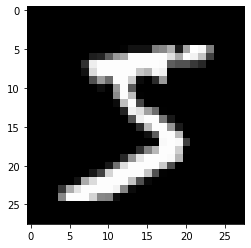

In [5]:
plt.imshow(train_images[0], cmap='gray')

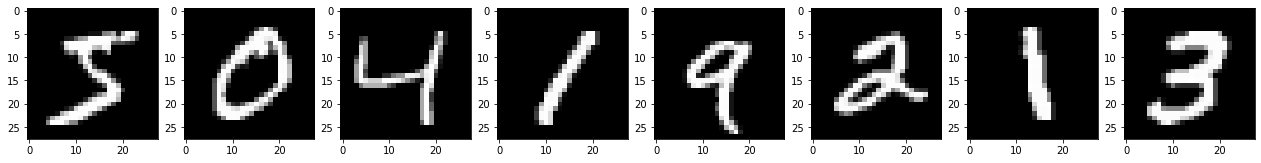

In [6]:
figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)
for i in range(8):
    axes[i].imshow(train_images[i], cmap='gray')

* 데이터 전처리

In [7]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)

In [8]:
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

* 모델 생성

In [9]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 50)                39250     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


In [11]:
model1 = Sequential()

model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(50, activation='sigmoid'))
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________


* 모델의 손실함수와 최적화 함수 설정, 학습 수행

* sparse_categorical_crossentropy : label이 integer일 때 사용하는 다중분류 손실함수
* categorical_crossentropy : label이 one-hot encoding일 때 사용하는 다중분류 손실함수

In [12]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [13]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_labels

array([5., 0., 4., ..., 5., 6., 8.], dtype=float32)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

In [17]:
train_oh_labels.shape, train_oh_labels[0]

((60000, 10), array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [18]:
history = model.fit(x=train_images, y=train_oh_labels, validation_split=0.2, batch_size=100, epochs=17, verbose=1)

Epoch 1/17
480/480 [==============================] - 1s 2ms/step - loss: 1.0673 - accuracy: 0.7705 - val_loss: 0.5386 - val_accuracy: 0.8784
Epoch 2/17
480/480 [==============================] - 1s 2ms/step - loss: 0.4759 - accuracy: 0.8809 - val_loss: 0.3863 - val_accuracy: 0.8986
Epoch 3/17
480/480 [==============================] - 1s 2ms/step - loss: 0.3818 - accuracy: 0.8964 - val_loss: 0.3365 - val_accuracy: 0.9063
Epoch 4/17
480/480 [==============================] - 1s 3ms/step - loss: 0.3403 - accuracy: 0.9045 - val_loss: 0.3059 - val_accuracy: 0.9147
Epoch 5/17
480/480 [==============================] - 1s 2ms/step - loss: 0.3141 - accuracy: 0.9108 - val_loss: 0.2870 - val_accuracy: 0.9194
Epoch 6/17
480/480 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.9163 - val_loss: 0.2716 - val_accuracy: 0.9231
Epoch 7/17
480/480 [==============================] - 1s 3ms/step - loss: 0.2789 - accuracy: 0.9205 - val_loss: 0.2615 - val_accuracy: 0.9258
Epoch 

In [19]:
history.history['loss']

[1.0672558546066284,
 0.47588956356048584,
 0.38177037239074707,
 0.34030818939208984,
 0.3141346871852875,
 0.29480066895484924,
 0.2789399027824402,
 0.26570388674736023,
 0.25417235493659973,
 0.24388441443443298,
 0.23463980853557587,
 0.22624658048152924,
 0.21849456429481506,
 0.2114695906639099,
 0.20512107014656067,
 0.19903691112995148,
 0.19325892627239227]

In [20]:
history.history['accuracy']

[0.7705416679382324,
 0.8809375166893005,
 0.8963958621025085,
 0.9044791460037231,
 0.910812497138977,
 0.9163333177566528,
 0.9204791784286499,
 0.9235625267028809,
 0.926770806312561,
 0.9296875,
 0.9324791431427002,
 0.934499979019165,
 0.9370416402816772,
 0.9390208125114441,
 0.9402499794960022,
 0.9425208568572998,
 0.9442291855812073]

* 시험 데이터로 예측

In [21]:
predict_prob = model.predict(test_images)

In [22]:
predict_prob.shape

(10000, 10)

In [23]:
predict_prob[0]

array([6.7513654e-05, 3.1521076e-06, 1.0589060e-03, 1.5175797e-03,
       9.0169380e-07, 7.8574718e-05, 7.3392698e-08, 9.9699402e-01,
       6.9224029e-06, 2.7245656e-04], dtype=float32)

* (참고) predict 안에 3차원 데이터 넣기<br>
1. reshape
2. np.expand_dims

In [24]:
test_images[0].shape

(28, 28)

In [25]:
test_images[0].reshape(-1, 28, 28).shape

(1, 28, 28)

In [26]:
np.expand_dims(test_images[0], axis=0).shape

(1, 28, 28)

model.compile : 학습 방식에 대한 환경 설정(optimizer, loss function, metric) <br>
model.fit : 학습 <br>
model.predict : 예측 <br>
model.evaluate : 검증 <br>

* 시험 데이터로 모델 성능 평가

In [27]:
model.evaluate(test_images, test_oh_labels, batch_size=100)

100/100 [==============================] - 0s 1ms/step - loss: 0.1928 - accuracy: 0.9428


[0.1927589774131775, 0.942799985408783]

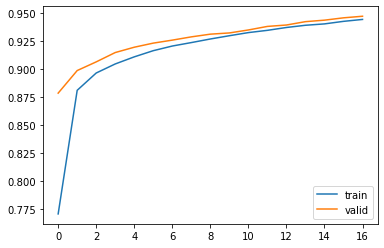

In [28]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend(loc='lower right')

## Fashion MNIST Dataset 신경망 훈련

In [29]:
from tensorflow.keras.datasets import fashion_mnist

* 데이터 적재

In [76]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [77]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

* 데이터 시각화

In [125]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

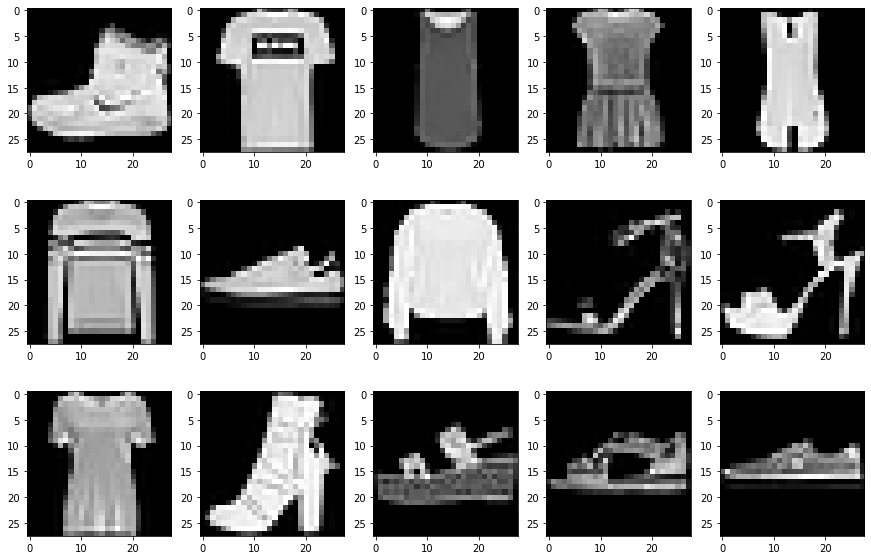

In [78]:
plt.figure(figsize = (15,10))

for i in range(15):
    image = train_images[i]
    plt.subplot(3, 5, i+1)
    plt.imshow(image, cmap='gray')

* 데이터 전처리

In [79]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

* 모델 생성

In [176]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(100, activation='sigmoid'),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [177]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_71 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_72 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [178]:
model.compile(optimizer=SGD(lr=0.1, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [179]:
train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

* 모델 학습(loss, optimizer 설정)

In [180]:
model.fit(x=train_images, y=train_oh_labels, validation_split=0.2, batch_size=100, epochs=20, verbose=1)

Epoch 1/20
480/480 [==============================] - 2s 3ms/step - loss: 0.7732 - accuracy: 0.7156 - val_loss: 0.4835 - val_accuracy: 0.8280
Epoch 2/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.8330 - val_loss: 0.4347 - val_accuracy: 0.8395
Epoch 3/20
480/480 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8499 - val_loss: 0.4092 - val_accuracy: 0.8503
Epoch 4/20
480/480 [==============================] - 1s 3ms/step - loss: 0.3822 - accuracy: 0.8600 - val_loss: 0.3747 - val_accuracy: 0.8619
Epoch 5/20
480/480 [==============================] - 1s 3ms/step - loss: 0.3628 - accuracy: 0.8687 - val_loss: 0.3568 - val_accuracy: 0.8690
Epoch 6/20
480/480 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8740 - val_loss: 0.3532 - val_accuracy: 0.8717
Epoch 7/20
480/480 [==============================] - 1s 3ms/step - loss: 0.3331 - accuracy: 0.8767 - val_loss: 0.3493 - val_accuracy: 0.8687
Epoch 

* 시험 데이터로 예측

In [99]:
pred = model.predict(test_images)

* 시험 데이터로 평가

In [153]:
model.evaluate(test_images, test_oh_labels, batch_size=100) # 100, 50, 10, momentum=0.9, lr=0.1, epochs=30

100/100 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.8871


[0.34274929761886597, 0.8870999813079834]